## Introduction to Machine Learning for Text Analysis and Classification with Python

https://bit.ly/PyData24ML
---
Developed by Sean Rogers, Sara Morrell, and Dipa Desai.

## Modules, Packages, and Libraries

While Python comes with many functions, there are thousands more that others have written. Adding them all to Python would create mass confusion, since many people could use the same name for functions that do different things. The solution then is that functions are stored in [modules](https://constellate.org/docs/key-terms/#module) that can be **imported** for use. A module is a Python file (extension ".py") that contains the definitions for the functions written in Python. These modules can then be collected into even larger groups called [packages](https://constellate.org/docs/key-terms/#package) and [libraries](https://constellate.org/docs/key-terms/#library). Depending on how many functions you need for the program you are writing, you may import a single module, a package of modules, or a whole library.

The general form of importing a module is:
`import module_name`

We start here by doing the following:
- Using pip to install packages
- Downloading tools from [NLTK](https://constellate-org.ezproxy.neu.edu/docs/key-terms/#nltk)
- Importing other general python packages
- Importing tools from SKlearn
- Importing tools from google files

It is best practice to put all imports and downloads in the first cell of a notebook so that all packages necessary to complete the task are downloaded.

In [1]:
#Installing Packages
!pip install contractions
!pip install demoji

#downloading NLTK tools
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

#Importing other python packages
import re
import contractions
import string
import demoji
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


#Importing SKlearn modules
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

#Googly stuff
from google.colab import files


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


To access one of the functions in the module, you have to specify the name of the module and the name of the function, separated by a dot (also known as a period). This format is called **dot notation**.

## Importing Data and Exploring the Dataframe

Now that we have all of the packages we need installed, we can download our data.
Here, we:
- Initialize a variable named url that serves as the link to our dataset.
- Reformat and split the url
- Pass the reformatted url to the read_csv function from pandas.

It is important to note that pandas has built in functions to read in a variety of data formats, including excel spreadsheets, [json,](https://https://constellate-org.ezproxy.neu.edu/docs/key-terms/#json) and text files.

In [2]:
url='https://drive.google.com/file/d/1cD7HhPgSeo-VRYtXgq7QhvjHPG804y-2/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

Now that we have the data imported, we can use the ``head()`` function to take a peak at first 5 rows our dataframe.

In [3]:
data.head(5)

,Unnamed: 0,tweet_text,harm_category,possibly_sensitive,tweet_language,like_count
0,0,Obligatory baby sloth selfie. 🍼🦥 Snooze is 11 ...,a,False,en,0
1,1,Sloth Selfie,a,False,en,1
2,2,A sloth selfie! 🦥🤳 Happy #NationalSelfieDay!,u,False,en,0
3,3,Sloth Selfie A.K.A Slofie :) Photo By Nicolas ...,a,False,en,0
4,4,Sloth selfie!,a,False,en,1


We can use the ``tail()`` function to look at the last two
rows. The number in the function call can be changed to a different number of rows, but we will stick with five for now.

In [4]:
data.tail(2)

,Unnamed: 0,tweet_text,harm_category,possibly_sensitive,tweet_language,like_count
998,998,「ナマケモノと自撮り」\nSloth selfie!\n\nめっちゃいい写真。ナマケモノ...,a,False,ja,0
999,999,「ナマケモノと自撮り」\nSloth selfie!\n\nめっちゃいい写真。ナマケモノ...,a,False,ja,0


It is probably a good idea to see what columns we are working with, we can use the columns method to return a list of the column names in our dataframe.

In [5]:
data.columns

Index(['Unnamed: 0', 'tweet_text', 'harm_category', 'possibly_sensitive',
       'tweet_language', 'like_count'],
      dtype='object')

The ``dtypes`` method allows us to see the data types for the columns in our dataframe. This is important because we would not want to try to perform textual operations on numerical data or vice versa.  

In [6]:
data.dtypes

Unnamed: 0             int64
tweet_text            object
harm_category         object
possibly_sensitive      bool
tweet_language        object
like_count             int64
dtype: object



```
# This is formatted as code
```

## Exploring Textual Data and Feature Engineering

The ``value_counts`` function can be called on a dataframe column and will return the count for distinct values in a column. Here, we call it on our ``harm_category`` column to see the class distribution we have to work with to train our model.

In [7]:
#harm category value counts
data['harm_category'].value_counts()

harm_category
a     485
e      95
u      29
b      15
aa      1
Name: count, dtype: int64

In [8]:
#Showing how to change class values by fixing our labeling mistake!
data['harm_category']=data['harm_category'].replace('aa','a')
data['harm_category'].value_counts()

harm_category
a    486
e     95
u     29
b     15
Name: count, dtype: int64

We can explore the textual dimensions of our data using the ``string.contains`` method. This function has a couple of helpful features.
- The function can be used to search one or multiple words as shown below
- We can make the search case sensitive or insensitive

This part of the process is where we can utilize human intuition to explore the different categories of our data and identify textual features that will help us categorize our data, and then translate this knowledge to a model as one-hot-encoded features.

The code `data.loc[]` allows you access rows and/or columns based on a label or a condition being `True` or `False`. More information in available in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) for the *pandas* module.

In [9]:
#String contains code to search single words
data.loc[data['tweet_text'].str.contains('slofie',case=False)]

,Unnamed: 0,tweet_text,harm_category,possibly_sensitive,tweet_language,like_count
3,3,Sloth Selfie A.K.A Slofie :) Photo By Nicolas ...,a,False,en,0


In [10]:
#String contains to code search multiple words
data.loc[data['tweet_text'].str.contains('slofie|selfies',case=False)]

,Unnamed: 0,tweet_text,harm_category,possibly_sensitive,tweet_language,like_count
3,3,Sloth Selfie A.K.A Slofie :) Photo By Nicolas ...,a,False,en,0
275,275,Learn more about how to have a responsible s...,e,False,en,0
276,276,Learn more about how to have a responsible s...,e,False,en,0
277,277,Learn more about how to have a responsible slo...,e,False,en,10
281,281,Ravensburger Selfies Sloth Selfie 500 Piece Ji...,b,False,en,0
293,293,Ravensburger Selfies Sloth Selfie 500 Piece Ji...,NaN,False,en,0
438,438,The truth behind every sloth selfie. Another p...,e,False,en,0
556,556,"Si buscas en ig el hashtag ""slothselfie"" (sel...",e,False,es,0
558,558,You would be surprised how much this guy lov...,u,False,en,0
559,559,You would be surprised how much this guy loved...,u,False,en,7


Once we have a sense of the kind of textual elements that are separating our data, we can begin creating columns. Here, we
- create a column of zeroes called ``is_funny``
- use string contains to find the rows of the ``tweet_text`` column that contain the word funny
- Assign value of 1 to the row

We are now one-hot-encoding!

We can repeat this as many times as necessary to capture all the features, but every feaature we add increases the dimensionality of our dataframe, so keep this in mind when dealing with larger datasets.

In [11]:
data['is_funny']=0 #Create a new column called is_funny and set the values in that column to 0
data.loc[data['tweet_text'].str.contains('funny',case=False), 'is_funny'] = 1 #Access all of the rows were the tweet_text contains funny and set the value of the column is_funny to 1 for that row

Here, we one-hot-encode different features we've identified as important to point our model to the differences between our different harm categories. It is important to do this feature engineering before preprocessing, as preprocessing may remove some information that could be helpful. It is up you as a modeler to decide what preprocessing steps are necessary based on the state of your data.

In [12]:
data['is_zoo']=0
data.loc[data['tweet_text'].str.contains('zoo',case=False), 'is_zoo'] = 1
data['is_cruel']=0
data.loc[data['tweet_text'].str.contains('cruel',case=False),'is_cruel'] = 1
data['is_amazing']=0
data.loc[data['tweet_text'].str.contains('amazing',case=False), 'is_amazing'] = 1
data['is_cute']=0
data.loc[data['tweet_text'].str.contains('cute',case=False), 'is_cute'] = 1
data['is_nick']=0
data.loc[data['tweet_text'].str.contains('nick|nicolas',case=False), 'is_nick'] = 1
data['is_slofie']=0
data.loc[data['tweet_text'].str.contains('slofie',case=False), 'is_slofie'] = 1
data['is_instagram']=0
data.loc[data['tweet_text'].str.contains('instagram',case=False), 'is_instagram'] = 1

## Making Functions for Preprocessing Text for Machine Learning

Now we are going to define functions to preprocess and clean our data in preparation for the algorithm.

We first initialize the variable `stopwords` as the set of English stop words from `NLTK`

[Stop words](https://en.wikipedia.org/wiki/Stop_word) are words that are considered insignificant to the analysis, for example, **the** is commonly included in stop word lists and excluded from analysis.

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
#Create a set of stop words from the stop words list in NLTK

Fixing contractions is one important step. This function:
- Takes the input text and iterates over each token, making it a string
-  Copies the strings to a new list
- Expands tokens containing contractions to their full form
- Returns the now expanded words as a list

Tokens are created through [tokenization](https://https://www.datacamp.com/blog/what-is-tokenization), which seperates a longer piece of text into shorter segments of characters for processing.


In [14]:
def fix_contractions(text):
    text = [str(i) for i in text]
    expanded = [i for i in text]
    no_contractions = [contractions.fix(i) for i in expanded]
    return no_contractions

This function uses the ``re`` package to remove usernames and links from the data, it works by:
- Substituting symbols in the list of tokens for empty space
- Substituting any token in the list of tokens that starts with https for empty space
- Substituting userames preceded by a retweet indicator with empty space

In [15]:
def remove_usernames_links(text):
    text = re.sub('@[^\s]+','',text)
    text = re.sub('http[^\s]+','',text)
    text = re.sub('RT','',text)
    return text

This function uses the ``demoji`` package to replace emojis in the text with empty space and returns the clean string.

In [16]:
def remove_emoji(text):
    result = demoji.replace(text, "")
    return result

This function uses a list comprehension to join elements of the text string that are not included in the ``string.punctuation`` module.



In [17]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

This function used a list comprehension to join elements of the text string that are not included in the ``stopwords.english`` module that we initialized a ``stopwords`` variable for.

In [18]:
def remove_stopwords(text):
    output= [i for i in text if i not in stop_words]
    return output

This function uses a list comprehension to join elements of the text string after lemmatizing them.

In [19]:
def lemmatize_text(text):
    output=[lemmatizer.lemmatize(i) for i in text]
    return output

Here, we bring it all together by creating a function to preprocess our data
The function
- Expands contractions using the ``contractions`` library
- Removes usernames and links from the text string
- Removes emojis from the text string using ``demoji``
- Removes punctuation from the text string
- Sets the characters to lowercase
- tokenizes the text string using the ``word_tokenizer()``
- Removes stopwords from the tokens
- Lemmatizes each token with the ``lemmatizer()``
- Joins the tokens back together to form a sentence
- Returns our modified ``data`` dataframe to us!

In [20]:
def preprocess(data):
    data['no_contractions']= fix_contractions(data['tweet_text'])
    data['no_usernames_links'] = [remove_usernames_links(i) for i in data['no_contractions']]
    data['no_emoji'] = [remove_emoji(i) for i in data['no_usernames_links']]
    data['no_punctuation'] = [remove_punctuation(i) for i in data['no_emoji']]
    data['tweet_lower']= data['no_punctuation'].apply(lambda x: x.lower())
    data['word_tokens'] = [word_tokenize(i) for i in data['tweet_lower']]
    data['no_stopwords']= data['word_tokens'].apply(lambda x:remove_stopwords(x))
    data['lemmatized']= [lemmatize_text (i) for i in data['no_stopwords']]
    data['joined_tokens'] = data['no_stopwords']
    data['joined_tokens'] = data['no_stopwords'].str.join(" ")
    return data

Here, we use call our ``preprocess()`` function on our dataframe and take a look at the now processed sentence string beside the old tweet text to see what the new sentence looks like and make sure our function performed how we expect it to.

In [21]:
preprocess(data)
data[['tweet_text','joined_tokens']].head(2)

,tweet_text,joined_tokens
0,Obligatory baby sloth selfie. 🍼🦥 Snooze is 11 ...,obligatory baby sloth selfie snooze 11 months ...
1,Sloth Selfie,sloth selfie


Now we use our multi-column indexing to take a look at the result of each processing step. Notice how different noisy elements of the data are removed while the semantic meaning remains largely unchanged.

In [22]:
data[['tweet_text','no_contractions','no_usernames_links','no_emoji','no_punctuation','no_stopwords','lemmatized','joined_tokens']].head(1)

,tweet_text,no_contractions,no_usernames_links,no_emoji,no_punctuation,no_stopwords,lemmatized,joined_tokens
0,Obligatory baby sloth selfie. 🍼🦥 Snooze is 11 ...,Obligatory baby sloth selfie. 🍼🦥 Snooze is 11 ...,Obligatory baby sloth selfie. 🍼🦥 Snooze is 11 ...,Obligatory baby sloth selfie. Snooze is 11 mo...,Obligatory baby sloth selfie Snooze is 11 mon...,"[obligatory, baby, sloth, selfie, snooze, 11, ...","[obligatory, baby, sloth, selfie, snooze, 11, ...",obligatory baby sloth selfie snooze 11 months ...


Our dataframe is now feature engineered and preprocessed for Natural Language Processing. The next step is to partition our labeled and unlabeled data. Here, we create two new data frames ``labeled`` and ``unlabeled`` by whether the record has a value in the ``harm_category`` column using the ``notna()`` and ``isna()`` methods.

In [23]:
labeled = data[data['harm_category'].notna()].copy()
unlabeled = data[data['harm_category'].isna()].copy()

Let's print the shapes of our new dataframes to see what we are working with. We can now observe that the ``labeled`` dataframe contains 675 records while the ``unlabeled`` dataframe contains 375 records.

In [24]:
print(labeled.shape,unlabeled.shape)

(625, 23) (375, 23)


## Classification Pipelines and Evaluating Our Model

In this section we will take our processed data and strip it down to the  bare necessities before constructing our classification pipeline in Scikitlearn. We will also discuss model evaluation, testing, and validity.

First we need to partition our labeled data. We initialize an ``X`` variable that included our cleaned sentence string as well as the features we one-hot-encoded earlier. We also initialize a ``y`` variable that represents the harm category column. The idea is that the ``X`` contains the features and examples the model needs to learn to map textual features to the harm category in our ``y``.

We also need to separate our labeled data into training and test sets. This is so that the model is learning and being tested on different data and we can see how it performs on unseen data.  Scikitlearn has a builtin function ``train_test_split`` to help us do this. We input our feature and target dataframes, set our ``test_size`` to 30% of the data. The final hyperparamater, ``random_state``, is set to 42. The random state works as a number generator to partition our data into test sets. It will always partition data the same way for the same number, allowing for reproducability.

In [25]:
X = labeled[['joined_tokens','is_funny','is_zoo','is_cruel','is_nick','is_cute','is_slofie','is_instagram']]
y = labeled['harm_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Now that we have our data split, we will use several SKlearn tools to create our classification pipeline. We need to initialize several variables to use the ``pipeline`` tool to construct our model. First, we initialize a variable called ``my_targets`` that is a list of our target classes, which in this case are all the unique values in our ``harm_category`` column. We then initialize the ``model`` variable. In this instance, we are using a ``RandomForestClassifier``, but we can change the model name to test different algorithms. Generally speaking, we should  try at least three different algorithms and compare the performance (we will discuss how to do this in a bit). We then initialize the variable ``vectorizer_1`` as a ``TfidfVectorizer()``.

Now that we have the variables initialized, we can use the ``ColumnTransformer()`` to tell the pipeline how we want data to be processed. We need to give a name for the vectorizer, so here we call our vectorizer ``tfidf1`` and give it our ``vectorizer1`` variable. We then pass the function our ``joined_tokens`` column containing the preprocessed text. This tells the pipeline to take our ``joined_tokens`` column and pass it through the ``tfidf1`` vectorizer. We set the ``remainder`` paramater to ``passthrough`` to tell the model to send our one hot ecoded features through the vectorizer unchanged. We do this because a vectorizer transforms textual data to weighted numerical data and text key value pairs, and the one hot encoded feaatures are already numerical.

Now that we have our variables iitialized and our column transformer set, we can construct our classification pipeline using the ``Pipeline()`` function from SkLearn. First, we initialize the ``pipe`` variable as the ``Pipeline()`` function. This fuction takes key value pairs as parameters that dictate how the classification pipeline flows. We insert our ``column_transformer`` as ``tfidf`` because it transforms the ``joined_tokens`` to weighted key-value pairs using the ``TfidfVectorizer()``.

Next, we insert our ``model`` variable as the ``classify`` step in the pipeline because our chosen algorithm will be used to train the model. Finally, we call the ``fit()`` function on our ``pipe`` variable, and pass it our ``X_train`` and ``y_train`` variables we created earlier when we split our data. Fitting our model with these traget and feature vectors trains it on the examples given in the training data to teach the model how to map the inputs to the expected outputs. Colab even presents with a tidy visualization of how our classification model flows. Congratulations, you have now trained (maybe your first) machine learing model! Now, let's see how it performs.


In [26]:
my_targets = ['a','u','b','e']
# initialise model and vectorizers

model = RandomForestClassifier(n_estimators=1000)
vectorizer1 = TfidfVectorizer()

# construct the column transfomer
column_transformer = ColumnTransformer(
    [('tfidf1', vectorizer1, 'joined_tokens')],
    remainder='passthrough')

# fit the model
pipe = Pipeline([
                  ('tfidf', column_transformer),
                  ('classify', model)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf1', TfidfVectorizer(),
                                                  'joined_tokens')])),
                ('classify', RandomForestClassifier(n_estimators=1000))])

To evaluate our model, we need to see how it performs on the test dataset that we witheld from it in the training proccess. First, we need our model to make predictions on the unseen data. To do this, we initialize the ``y_pred`` variable. To make the predictions, we call the ``predict()`` function on our model, ``pipe``, and pass it our test dataset ``X_test``. This uses the model we trained to evaluate the data it has not seen yet so we can see how well it generalizes. To assess this quantitatively, we use the ``accuracy_score()`` and ``classification_report()`` functions.

First, call the ``accuracy_score()`` function, and pass it our ``y_pred`` variable (the predictions) and our ``y_test`` variable (the actual categories). We wrap this in a ``print()`` function so we can print the accuracy scores. Next, we call the ``classification_report()`` function and pass it our ``y_test``, ``y_pred``, and ``target_names`` variables, and again wrap it in a ``print()`` function so we can see the results. Doing this allows us to see a classification report that gives us ``accuracy``, ``precision``, ``recall``, and ``F1`` scores for the different ``target classes`` in our data.

To further evaluate our model, we perform use ``cross-validation`` with 5 ``folds`` to evaluate the model's ``F1 score``. We calculate the average ``F1 score`` across classes for each fold to get a sense of the model's overall performance.

In addition to cross-validation, we examine the predictions our model made on our ``test set``. The ''confusion matrix'' shows the counts of ``true positives``, ``false positives``, ``true negatives``, and ``false negatives``, providing a detailed view of the model’s performance.

After ``cross-validation``, we make predictions on the unseen test dataset. We then calculate the accuracy score to assess the proportion of correctly classified instances. Lastly, we generate a classification report that includes the accuracy, precision, recall, and F1 scores for each target class, giving a comprehensive evaluation of the model’s performance.



In [27]:
y_pred = pipe.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_targets))

accuracy 0.9414893617021277
              precision    recall  f1-score   support

           a       0.95      0.98      0.97       144
           u       1.00      0.25      0.40         4
           b       0.97      1.00      0.98        29
           e       0.67      0.55      0.60        11

    accuracy                           0.94       188
   macro avg       0.90      0.69      0.74       188
weighted avg       0.94      0.94      0.93       188



In [28]:
#Cross Validation
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring=f1_scorer)

# Print F1 scores for each fold
for fold_idx, f1 in enumerate(cv_scores, 1):
    print(f"Fold {fold_idx}: F1 Score = {f1:.4f}")

# Print average F1 score across all folds
print(f"Average F1 Score: {cv_scores.mean():.4f}")

Fold 1: F1 Score = 0.9767
Fold 2: F1 Score = 0.9529
Fold 3: F1 Score = 0.9304
Fold 4: F1 Score = 0.9191
Fold 5: F1 Score = 0.9294
Average F1 Score: 0.9417


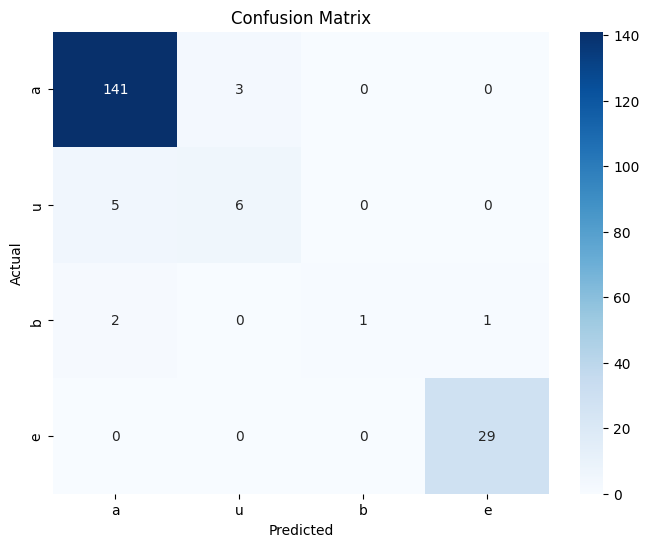

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['a', 'u', 'b', 'e'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['a', 'u', 'b', 'e'], yticklabels=['a', 'u', 'b', 'e'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Now that we have evaluated our model and are satisfied with the results, we can use our ``pipe`` model to make precictions on the ``unlabeled`` dataframe. This process of using a labeled portion of a dataset to label a larger unlabeled portion is called ``pseudolabeling``. To pseudolabel our data, we initialize a new ``harm_category`` column and set it to populate with the results of the predictions made using our ``pipe`` model with the ``predict()`` function on our ``unlabeled`` data.

In [30]:
unlabeled['harm_category'] = pipe.predict(unlabeled)

Now that the data is labeled, we can use the ``value_counts()`` function to take a peak at the results.

In [31]:
unlabeled['harm_category'].value_counts()

harm_category
u    144
a    131
b     86
e     14
Name: count, dtype: int64

Now that we have labels for our ``unlabeled`` dataframe, we can combine the ``labeled`` and ``unlabeled`` dataframes using the ``pd.concat()`` function. First, we construct a list called ``frames`` consisting of our ``labeled`` and ``unlabeled`` data. Then, we initialize a variable ``pseudolabeled`` to serve as a single dataframe combining the ``labeled`` and ``unlabeled`` dataframes. Finally, we use the ``pd.concat()`` function to concatenate the dataframes. This works because they have the same column structure and can be combined on that basis.

In [32]:
frames = [labeled,unlabeled]
pseudolabeled = pd.concat(frames)

We observe now that ``pseudolabeled`` contains N=1,000 rows, our data is combined!

In [33]:
pseudolabeled.shape

(1000, 23)

With the ``unlabeled`` and ``labeled`` dataframes now combined as a single labeled dataset that can be analyzed, we might find ourselves in situations where we would like to have a copy of the labeled data on our local machine. This could be to provide the data to an external stakeholder or to analyze the data using another software. The code below uses the ``to_csv`` function to convert our dataframe to a csv file named ``pseudolabeled_data.csv``. Then, we use the ``download()`` function from the ``files`` package to download the newly created file.

In [34]:
pseudolabeled.to_csv('pseudolabeled_data.csv')
files.download('pseudolabeled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>